### **TP Final TP Final Aprendizaje de Máquina I:**
Evaluación de la performance de modelos de clasificación con datos tumores de cáncer de mama en *malignos* o *benignos*.

Estudiantes:


*   Gustavo Julián Rivas
*   Myrna Lorena Degano
*   Santiago José Olaciregui
*   Fabricio Lopretto

## 4 - Algoritmos:

Originalmente la variable objetivo 'diagnosis' es categórica dado que puede tomar valors 'M' (maligno) o 'B' (benigno). Esto permite encarar la aplicación de algoritmos de clasificación. No obstante, la creación de la variable 'dummy' 'diagnosis_M' permite aplicar algoritmos de regresión dado la naturaleza numérica del objetivo creado.

A partir de lo anterior, se decidió aplicar y comparar los resultados de los siguientes modelos:

4.1 Regresión Logística.

4.2 SVC.

4.3 Árbol de Clasificación.

4.4 Perceptrón.

Los atributos categóricos son:

Atributo |
:---: | 
`diagnosis`|         

Luego del análisis de datos y de la ingeniería de características, se obtuvo que las
características relevantes son :

Atributo |
:---: |
`radio_mean` |    
`concavity_mean` |     
`concavity_worst`|
`concave_points_worst`|

Cabe mencionar, que en esta notebook se replican la aplicación de modelos, pero eliminando la característica radio_worst dada su elevada correlación lineal con radio_mean. Se analiza si la performance mejora o no.


In [ ]:
"""
Este script permite implementar y evaluar el desempeño de modelos de regresión.
"""

In [1]:
# Importa las librerias nencesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Define la ruta al archivo de datos
directorio_actual = os.getcwd()
directorio_padre = os.path.dirname(directorio_actual)
directorio_datos = directorio_padre + '/Data/data_para_entrenamiento_v2.xlsx'

In [3]:
# Carga del DataFrame con los registros que tienen los atributos y target.
df = pd.read_excel(directorio_datos, sheet_name='data')

In [4]:
# Se elimina característica radio_worst
df = df.drop('radio_worst', axis=1)

In [5]:
# Visualiza informacion del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             550 non-null    object 
 1   radio_mean            550 non-null    float64
 2   concavity_mean        550 non-null    float64
 3   concavity_worst       550 non-null    float64
 4   concave_points_worst  550 non-null    float64
dtypes: float64(4), object(1)
memory usage: 21.6+ KB


In [6]:
# Importa split de datos, busqueda de hiper-parametros, estandarizacion y metricas
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [7]:
# Separa las caracteristicas y el objetivo
X = df.loc[:, ['radio_mean', 'concavity_mean', 'concavity_worst', 'concave_points_worst']].values
y = df.loc[:, "diagnosis"].values

In [8]:
# Divide los datos en conjunto de entrenamiento y prueba 80/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Normaliza el set de entrenamiento y de prueba de las caracteristicas
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

#### 4.1 Regresión Logística

In [10]:
# Importa el algoritmo
from sklearn.linear_model import LogisticRegression

In [11]:
# Define la grilla de hiper-parametros
param_grid = {
    'C': [0.1, 1, 10, 100],  # Hiperparámetro para la regularización
    'solver': ['liblinear', 'lbfgs']  # Solvers para la optimización
}

In [12]:
# Asigna el modelo
model = LogisticRegression(max_iter=1000)

In [13]:
# Configura la busqueda de hiper-parametros por grilla con validacion cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')  # Puedes ajustar la métrica según lo que prefieras

In [14]:
# Entrena el modelo
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [15]:
# Obtiene el mejor modelo
best_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {best_model}")

Mejores hiperparámetros: LogisticRegression(C=10, max_iter=1000, solver='liblinear')


In [16]:
# Obtiene las metricas en el conjunto de prueba
y_pred = best_model.predict(X_test)

In [17]:
# Calcula metricas
precision = precision_score(y_test, y_pred, pos_label='M')  # Asegúrate de que 'M' sea la etiqueta positiva
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['M', 'B'])

# Muestra metricas
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9117647058823529
Recall: 0.8611111111111112
F1 Score: 0.8857142857142857


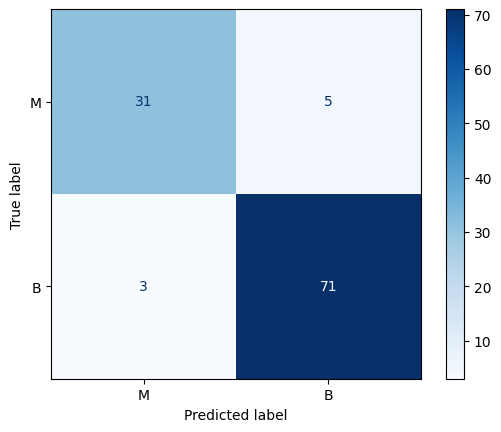

In [18]:
# Muestra matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['M', 'B'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### 4.2 SVC

In [19]:
# Importa el algoritmo
from sklearn.svm import SVC

In [20]:
# Define la grilla de hiperparametros
param_grid = {
    'C': [0.1, 1, 10, 100],  # Hiperparámetro para la regularización
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipos de núcleos
    'gamma': ['scale', 'auto']  # Parámetro del núcleo
}

In [21]:
# Support Vector Classifier
model = SVC()  

In [22]:
# Define la grilla de hiper-parametros
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy') 

In [23]:
# Entrena el modelo
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [24]:
# Obtiene los mejores hiper-parametros
best_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {best_model}")

Mejores hiperparámetros: SVC(C=10)


In [25]:
# Obtiene las metricas en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular métricas
precision = precision_score(y_test, y_pred, pos_label='M')  # Asegúrate de que 'M' sea la etiqueta positiva
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['M', 'B'])

# Mostrar métricas
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9142857142857143
Recall: 0.8888888888888888
F1 Score: 0.9014084507042254


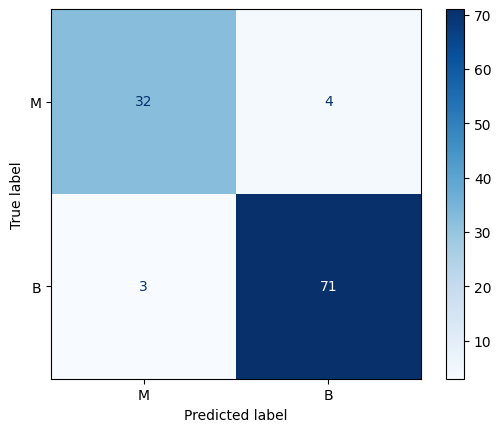

In [26]:
# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['M', 'B'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### 4.3 Árbol de Clasificación

In [27]:
# Importa el algoritmo
from sklearn.tree import DecisionTreeClassifier

In [28]:
# Crea el modelo de arbol de clasificacion
model = DecisionTreeClassifier()

In [29]:
# Define la grilla de hiper-parametros
param_grid = {
    'criterion': ['gini', 'entropy'],  # Funcion para medir la calidad de una division
    'max_depth': [None, 10, 20, 30],   # Profundidad máxima del arbol
    'min_samples_split': [2, 5, 10],   # Numero minimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]      # Numero minimo de muestras requeridas para estar en una hoja
}

In [30]:
# Configura GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

In [31]:
# Entrena el modelo
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [32]:
# Obtiene los mejores hiper-parametros
best_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {best_model}")

Mejores hiperparámetros: DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)


In [33]:
# Obtiene las metricas en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcula metricas
precision = precision_score(y_test, y_pred, pos_label='M')  # Asegúrate de que 'M' sea la etiqueta positiva
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['M', 'B'])

# Mostrar métricas
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1 Score: 0.8888888888888888


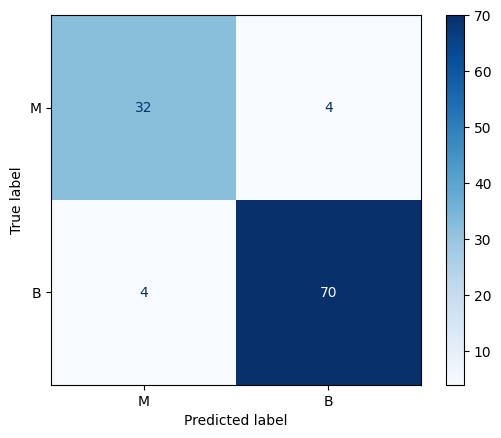

In [34]:
# Muestra matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['M', 'B'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### 4.4 Perceptrón

In [35]:
# Importa el algoritmo
from sklearn.linear_model import Perceptron

In [36]:
# Crea el modelo de perceptron
model = Perceptron()

In [37]:
# Define la grilla de hiper-parametros
param_grid = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],  # Tipo de regularizacion
    'alpha': [0.0001, 0.001, 0.01],  # Parametro de regularizacion
    'max_iter': [1000, 5000, 10000],  # Numero maximo de iteraciones
    'eta0': [1.0, 0.1, 0.01]  # Tasa de aprendizaje inicial
}

In [38]:
# Realiza la busqueda de hiperparametros con GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

In [39]:
# Entrena el modelo
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Perceptron(),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [1.0, 0.1, 0.01],
                         'max_iter': [1000, 5000, 10000],
                         'penalty': [None, 'l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [40]:
# Obtiene los mejores hiperparametros
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", best_model)

Mejores hiperparámetros: Perceptron(eta0=0.01, penalty='elasticnet')


In [41]:
# Obtiene las metricas en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Metricas
precision = precision_score(y_test, y_pred, pos_label='M')  # Asegúrate de que 'M' sea la etiqueta positiva
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['M', 'B'])

# Mostrar métricas
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.5625
Recall: 1.0
F1 Score: 0.72


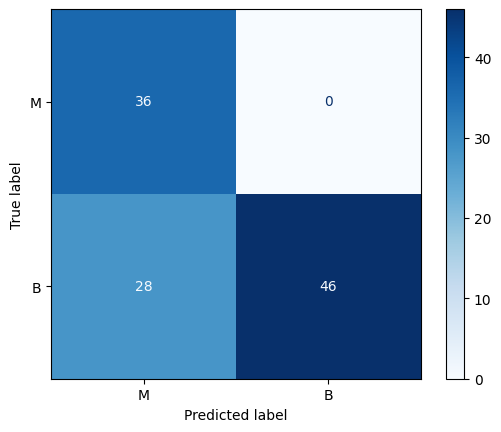

In [42]:
# Muestra matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['M', 'B'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Se realizó una tabla comparativa de los resultados de las métricas sobre el conjunto datos de prueba:

| Modelo                 | Presición | Recall | F1-Score |
|------------------------|-----------|--------|----------|
| Regresión Logistica    |    0.91   |  0.86  |   0.89   |
| SVC                    |    0.91   |  0.89  |   0.90   |
| Árbol de Clasificación |    0.89   |  0.89  |   0.89   |
| Perceptrón             |    0.56   |  1.00  |   0.72   |

Conclusiones: En general las métricas muestran una disminución en la performance de los modelos al remover radio_worst.

Pregunta 3: Cómo se comparan las características de los tumores benignos más cercanos a la frontera de clasificación con los tumores malignos?. Es decir, analizar los casos que son más difíciles de clasificar, aquellos que están cerca de la frontera de decisión de un clasificador. 

In [43]:
# Prepara los datos
X = df[['radio_mean', 'concavity_mean', 'concavity_worst', 'concave_points_worst']]
y = df['diagnosis'].map({'M': 1, 'B': 0})

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Entrena un modelo de regresion logistica
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [45]:

# Obtiene las probabilidades de clasificacion para las muestras de prueba
probabilities = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase 'M'

In [46]:

# Determina la distancia de las probabilidades al umbral 0.5
distance_to_boundary = np.abs(probabilities - 0.5)

In [47]:
# Crea un DataFrame para analizar los casos cercanos a la frontera
results = X_test.copy()
results['probability_M'] = probabilities
results['true_label'] = y_test.values  # Asegúrate de que y_test sea un array 1D
results['distance_to_boundary'] = distance_to_boundary
results['predicted_label'] = model.predict(X_test)

In [51]:

# Filtra los tumores benignos y malignos mas cercanos a la frontera
benign_near_boundary = results[(results['true_label'] == 0) & (results['distance_to_boundary'] < 0.1)]
malignant_near_boundary = results[(results['true_label'] == 1) & (results['distance_to_boundary'] < 0.1)]

In [49]:
# Muestra caracteristicas de los benignos cerca de la frontera
print("Características de los tumores benignos cercanos a la frontera:")
print(benign_near_boundary.describe())

Características de los tumores benignos cercanos a la frontera:
       radio_mean  concavity_mean  concavity_worst  concave_points_worst  \
count     1.00000        1.000000         1.000000              1.000000   
mean      0.24521        0.939608         0.358076              0.004987   
std           NaN             NaN              NaN                   NaN   
min       0.24521        0.939608         0.358076              0.004987   
25%       0.24521        0.939608         0.358076              0.004987   
50%       0.24521        0.939608         0.358076              0.004987   
75%       0.24521        0.939608         0.358076              0.004987   
max       0.24521        0.939608         0.358076              0.004987   

       probability_M  true_label  distance_to_boundary  predicted_label  
count        1.00000         1.0               1.00000              1.0  
mean         0.43007         0.0               0.06993              0.0  
std              NaN         

In [50]:
# Muestra caracteristicas de los malignos cerca de la frontera
print("\nCaracterísticas de los tumores malignos cercanos a la frontera:")
print(malignant_near_boundary.describe())


Características de los tumores malignos cercanos a la frontera:
       radio_mean  concavity_mean  concavity_worst  concave_points_worst  \
count    2.000000        2.000000         2.000000              2.000000   
mean    -0.232836        0.587668         1.401431              0.449434   
std      0.583266        0.014578         1.376319              0.363536   
min     -0.645267        0.577360         0.428227              0.192376   
25%     -0.439051        0.582514         0.914829              0.320905   
50%     -0.232836        0.587668         1.401431              0.449434   
75%     -0.026620        0.592822         1.888033              0.577963   
max      0.179596        0.597976         2.374636              0.706493   

       probability_M  true_label  distance_to_boundary  predicted_label  
count       2.000000         2.0              2.000000         2.000000  
mean        0.489448         1.0              0.015772         0.500000  
std         0.022304        

Los tumores benignos y malignos cerca de la frontera de decisión tienen características que los hacen difíciles de clasificar. Sin embargo, las diferencias en características como concavity_worst y concave_points_worst parecen ser claves en la diferenciación. Los tumores malignos muestran, por ejemplo, valores más altos de valor medio (mean) en estas características, lo que puede contribuir a su clasificación como malignos.

Pregunta 4 - Cómo varía la precisión del modelo con diferentes tamaños de muestra?. Es decir, analizar la curva de aprendizaje para ver cómo el tamaño del conjunto de entrenamiento afecta la precisión del modelo.

In [46]:
# Importa las clases necesarias
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, learning_curve

In [48]:

# Convertir el objetivo a valores numericos
y = df['diagnosis'].map({'M': 1, 'B': 0})

train_sizes son los tamaños de muestra, train_scores son las precisiones del entrenamiento, y test_scores son las precisiones del conjunto de validación.

In [49]:
# Genera la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(max_iter=1000), X_train, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)



In [50]:
# Calcula las medias y desviaciones estandar para las precisiones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

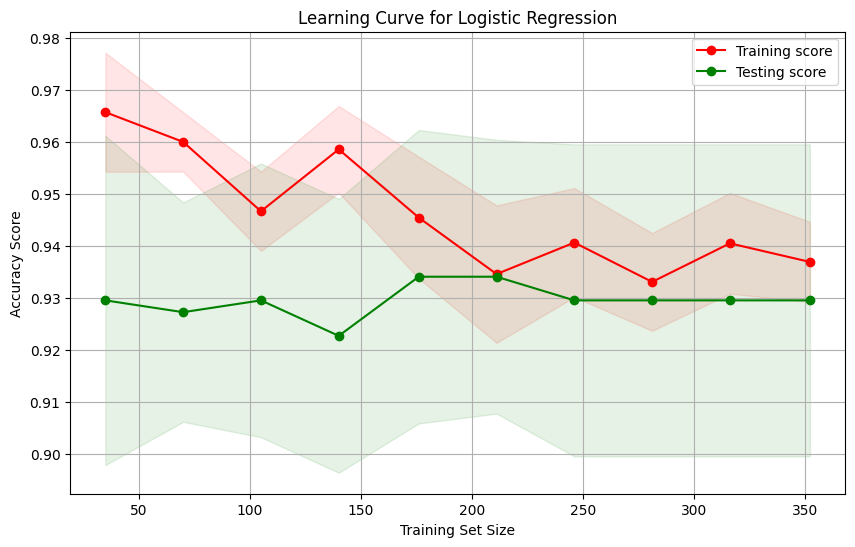

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Testing score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)

plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()

Este gráfico muestra como la precisión del modelo varía según el tamaño del conjunto de entrenamiento. Aquí algunos puntos clave que podrías observar:

En tamaños pequeños de entrenamiento, como la precisión de entrenamiento es alta pero la de evaluación es baja, el modelo podría estar sobreajustando para esos casos.
Se observó cierta convergencia, es decir si las curvas de entrenamiento y evaluación se acercan a medida que aumenta el tamaño del conjunto de entrenamiento, el modelo está mejorando.

Bibliografía:

Isabelle Guyon, Andre Elisseeff (2003). An introduction to variable and feature selection. Journal of Machine Learning Research 3 (2003) 1157-1182


Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.


W. Street, W. Wolberg, O. Mangasarian. (1992)
Nuclear feature extraction for breast tumor diagnosis.
Published in Electronic imaging.


